In [271]:
# Import Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [272]:
# Upload Dataset into the notebook
crime=pd.read_csv("D:\CSV FIles Path\Assignments\Clustering\crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [273]:
# Renaming a blank Column Head
crime.rename(columns={"Unnamed: 0":'States'}, inplace=True)
crime.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [274]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [275]:
# Conveterting datatype Object to Category 
crime['States']=crime['States'].astype("category")
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   States    50 non-null     category
 1   Murder    50 non-null     float64 
 2   Assault   50 non-null     int64   
 3   UrbanPop  50 non-null     int64   
 4   Rape      50 non-null     float64 
dtypes: category(1), float64(2), int64(2)
memory usage: 4.2 KB


In [276]:
# check the no. of rows and Column
crime.shape

(50, 5)

## Create and Append Array

In [277]:
array=crime.iloc[:,1:5].values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

## Scaling of DATA. Apply standarised Scaling

In [278]:
stscaler = StandardScaler().fit(array)
dbscan = stscaler.transform(array)

In [279]:
dbscan

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## Apply DBSCAN to find the nearest neighbour and the K Distance

In [280]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(dbscan)
distances, indices = nbrs.kneighbors(dbscan)

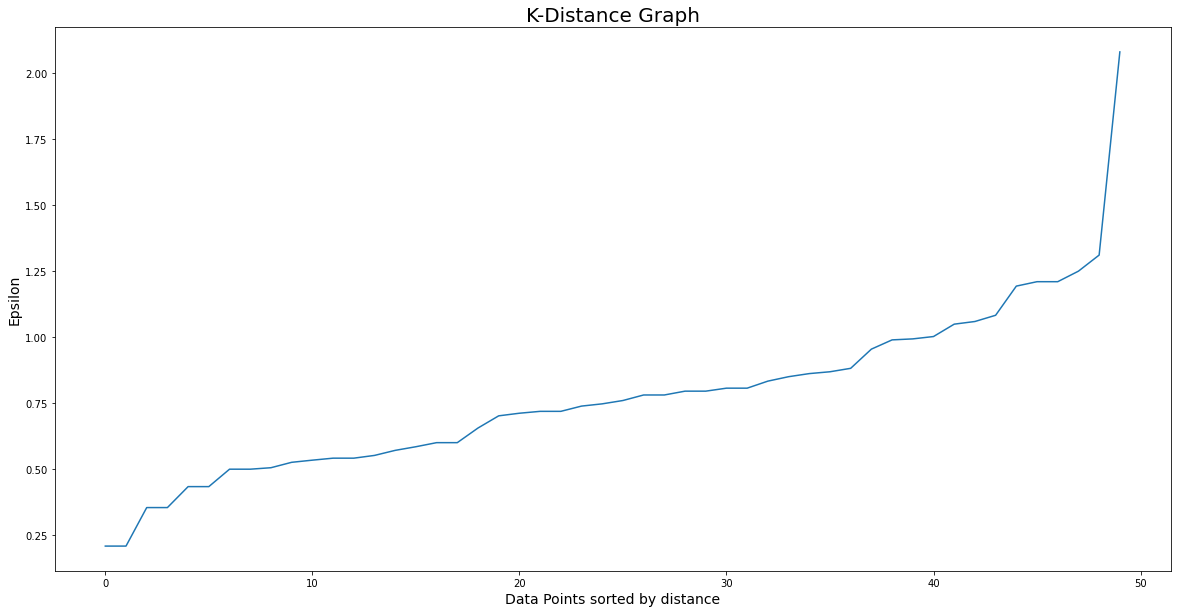

In [281]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-Distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

### Elbow seems to be at 1.15. hence let take the EPSILON at 1.15. Epsilon can be taken anywhere within 3

In [282]:
dbscan_new = DBSCAN(eps=1.15, min_samples=4)
dbscan_new.fit(dbscan)

DBSCAN(eps=1.15, min_samples=4)

### Noisy samples are given the label -1

In [283]:
dbscan_new.labels_

array([ 0, -1,  1,  2, -1, -1,  2, -1, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2, -1,  2,  2,  1,  1,  0,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  1,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

### Add DBSCAN Clusters to the original dataset

In [284]:
crime['Cluster_no']=pd.DataFrame(dbscan_new.labels_)
crime

,States,Murder,Assault,UrbanPop,Rape,Cluster_no
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


### Check the values under each Clusters

In [285]:
## -1 Values are the OUTLIERS
crime['Cluster_no'].value_counts()

 2    30
 0     7
 1     7
-1     6
Name: Cluster_no, dtype: int64

### Check the Cluster Accuracy

In [286]:
metrics.silhouette_score
metrics.silhouette_score(dbscan,dbscan_new.labels_)

0.28523184583363054

In [287]:
6/50

0.12

In [288]:
crime.groupby('Cluster_no').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster_no,,,,
-1,10.066667,261.333333,75.000000,36.250000
0,14.671429,251.285714,54.285714,21.685714
1,11.014286,262.571429,77.142857,28.800000
2,4.973333,112.433333,63.566667,16.356667


In [289]:
# Adding a Total_crime col to see the relationship with the cluster
crime["Total_Crime"] = crime.Murder + crime.Assault + crime.Rape
crime

,States,Murder,Assault,UrbanPop,Rape,Cluster_no,Total_Crime
0,Alabama,13.2,236,58,21.2,0,270.4
1,Alaska,10.0,263,48,44.5,-1,317.5
2,Arizona,8.1,294,80,31.0,1,333.1
3,Arkansas,8.8,190,50,19.5,2,218.3
4,California,9.0,276,91,40.6,-1,325.6
5,Colorado,7.9,204,78,38.7,-1,250.6
6,Connecticut,3.3,110,77,11.1,2,124.4
7,Delaware,5.9,238,72,15.8,-1,259.7
8,Florida,15.4,335,80,31.9,-1,382.3
9,Georgia,17.4,211,60,25.8,0,254.2


In [291]:
#shift column 'Cluster_no' to last position
last_column = crime.pop('Cluster_no')

In [292]:
# insert column using insert(position,column_name,last_column) function
crime.insert(6, 'Cluster_no', last_column)

In [293]:
crime

,States,Murder,Assault,UrbanPop,Rape,Total_Crime,Cluster_no
0,Alabama,13.2,236,58,21.2,270.4,0
1,Alaska,10.0,263,48,44.5,317.5,-1
2,Arizona,8.1,294,80,31.0,333.1,1
3,Arkansas,8.8,190,50,19.5,218.3,2
4,California,9.0,276,91,40.6,325.6,-1
5,Colorado,7.9,204,78,38.7,250.6,-1
6,Connecticut,3.3,110,77,11.1,124.4,2
7,Delaware,5.9,238,72,15.8,259.7,-1
8,Florida,15.4,335,80,31.9,382.3,-1
9,Georgia,17.4,211,60,25.8,254.2,0


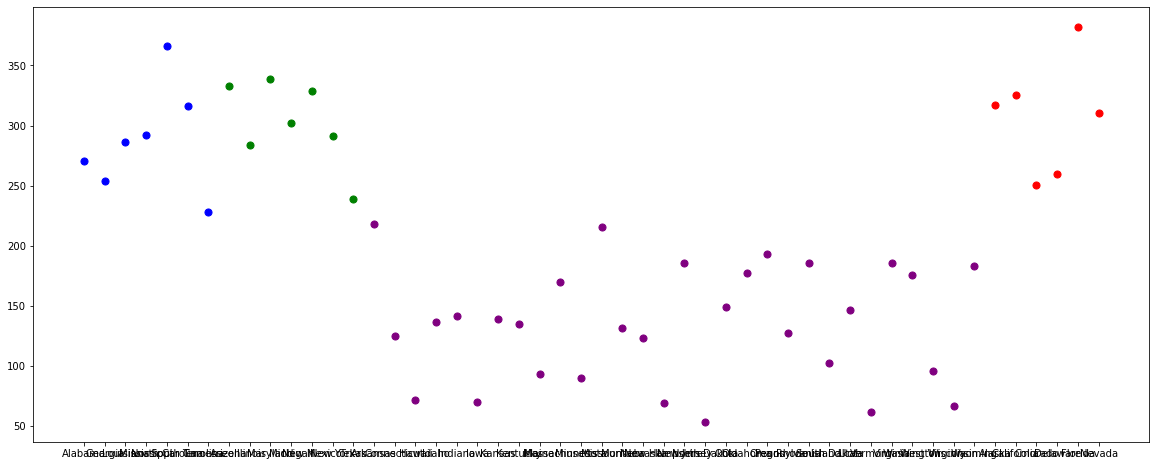

In [297]:
# Visualisation: States VS Total Crime

plt.rcParams["figure.figsize"] = (20,8)
Cluster0 = crime[crime.Cluster_no==0]
Cluster1 = crime[crime.Cluster_no==1]
Cluster2 = crime[crime.Cluster_no==2]
Noise = crime[crime.Cluster_no==-1]

plt.scatter(Cluster0.States, Cluster0.Total_Crime,s=50, color="blue")
plt.scatter(Cluster1.States, Cluster1.Total_Crime,s=50, color="green")
plt.scatter(Cluster2.States, Cluster2.Total_Crime,s=50, color="purple")
plt.scatter(Noise.States, Noise.Total_Crime,s=50, color="red")
plt.show()

In [298]:
# Checking total Crime for Cluster 2 in desending Order
crime[crime['Cluster_no']==2].sort_values("Total_Crime",ascending=False)

,States,Murder,Assault,UrbanPop,Rape,Total_Crime,Cluster_no
3,Arkansas,8.8,190,50,19.5,218.3,2
24,Missouri,9.0,178,70,28.2,215.2,2
36,Oregon,4.9,159,67,29.3,193.2,2
38,Rhode Island,3.4,174,87,8.3,185.7,2
29,New Jersey,7.4,159,89,18.8,185.2,2
45,Virginia,8.5,156,63,20.7,185.2,2
49,Wyoming,6.8,161,60,15.6,183.4,2
35,Oklahoma,6.6,151,68,20.0,177.6,2
46,Washington,4.0,145,73,26.2,175.2,2
20,Massachusetts,4.4,149,85,16.3,169.7,2


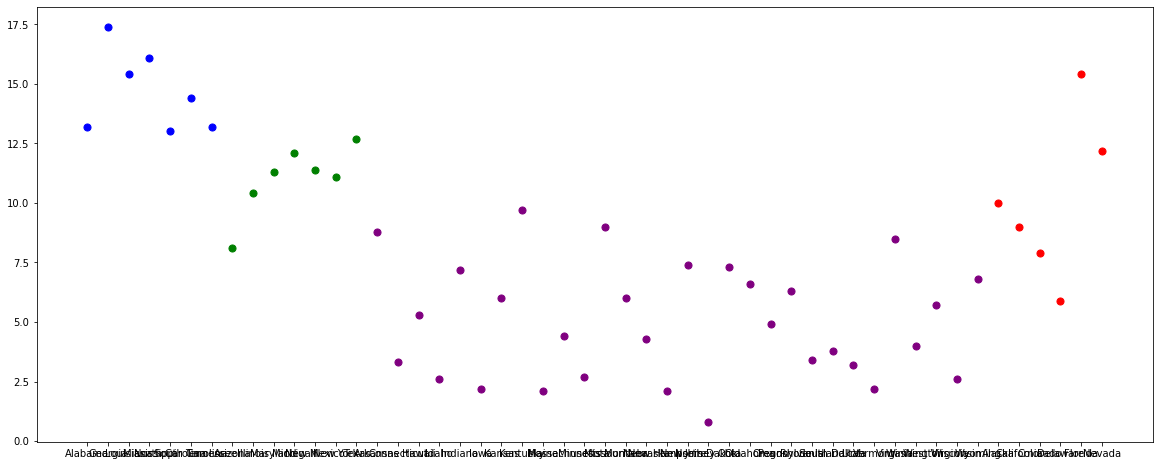

In [300]:
# Visualisation: States VS Murder Rate

plt.rcParams["figure.figsize"] = (20,8)
Cluster0 = crime[crime.Cluster_no==0]
Cluster1 = crime[crime.Cluster_no==1]
Cluster2 = crime[crime.Cluster_no==2]
Noise = crime[crime.Cluster_no==-1]

plt.scatter(Cluster0.States, Cluster0.Murder,s=50, color="blue")
plt.scatter(Cluster1.States, Cluster1.Murder,s=50, color="green")
plt.scatter(Cluster2.States, Cluster2.Murder,s=50, color="purple")
plt.scatter(Noise.States, Noise.Murder,s=50, color="red")
plt.show()

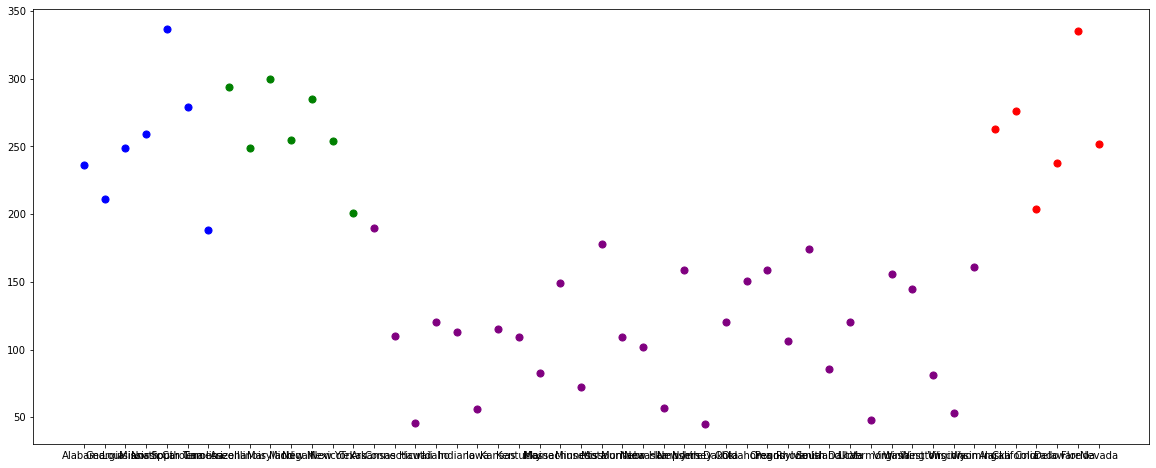

In [305]:
# Visualisation: States VS Assault

plt.rcParams["figure.figsize"] = (20,8)
Cluster0 = crime[crime.Cluster_no==0]
Cluster1 = crime[crime.Cluster_no==1]
Cluster2 = crime[crime.Cluster_no==2]
Noise = crime[crime.Cluster_no==-1]

plt.scatter(Cluster0.States, Cluster0.Assault,s=50, color="blue")
plt.scatter(Cluster1.States, Cluster1.Assault,s=50, color="green")
plt.scatter(Cluster2.States, Cluster2.Assault,s=50, color="purple")
plt.scatter(Noise.States, Noise.Assault,s=50, color="red")
plt.show()


In [306]:
# Checking total Crime for Cluster 1 in desending Order
crime[crime['Cluster_no']==1].sort_values("Total_Crime",ascending=False)

,States,Murder,Assault,UrbanPop,Rape,Total_Crime,Cluster_no
19,Maryland,11.3,300,67,27.8,339.1,1
2,Arizona,8.1,294,80,31.0,333.1,1
30,New Mexico,11.4,285,70,32.1,328.5,1
21,Michigan,12.1,255,74,35.1,302.2,1
31,New York,11.1,254,86,26.1,291.2,1
12,Illinois,10.4,249,83,24.0,283.4,1
42,Texas,12.7,201,80,25.5,239.2,1


In [307]:
# Checking total Crime for Cluster 0 in desending Order
crime[crime['Cluster_no']==0].sort_values("Total_Crime",ascending=False)

,States,Murder,Assault,UrbanPop,Rape,Total_Crime,Cluster_no
32,North Carolina,13.0,337,45,16.1,366.1,0
39,South Carolina,14.4,279,48,22.5,315.9,0
23,Mississippi,16.1,259,44,17.1,292.2,0
17,Louisiana,15.4,249,66,22.2,286.6,0
0,Alabama,13.2,236,58,21.2,270.4,0
9,Georgia,17.4,211,60,25.8,254.2,0
41,Tennessee,13.2,188,59,26.9,228.1,0


In [308]:
# Checking total Crime for Cluster with NOISE in desending Order
crime[crime['Cluster_no']==-1].sort_values("Total_Crime",ascending=False)

,States,Murder,Assault,UrbanPop,Rape,Total_Crime,Cluster_no
8,Florida,15.4,335,80,31.9,382.3,-1
4,California,9.0,276,91,40.6,325.6,-1
1,Alaska,10.0,263,48,44.5,317.5,-1
27,Nevada,12.2,252,81,46.0,310.2,-1
7,Delaware,5.9,238,72,15.8,259.7,-1
5,Colorado,7.9,204,78,38.7,250.6,-1


In [309]:
# Checking total Crime for Cluster 2 in desending Order
crime[crime['Cluster_no']==2].sort_values("Total_Crime",ascending=False)

,States,Murder,Assault,UrbanPop,Rape,Total_Crime,Cluster_no
3,Arkansas,8.8,190,50,19.5,218.3,2
24,Missouri,9.0,178,70,28.2,215.2,2
36,Oregon,4.9,159,67,29.3,193.2,2
38,Rhode Island,3.4,174,87,8.3,185.7,2
29,New Jersey,7.4,159,89,18.8,185.2,2
45,Virginia,8.5,156,63,20.7,185.2,2
49,Wyoming,6.8,161,60,15.6,183.4,2
35,Oklahoma,6.6,151,68,20.0,177.6,2
46,Washington,4.0,145,73,26.2,175.2,2
20,Massachusetts,4.4,149,85,16.3,169.7,2


In [318]:
crime.groupby('Cluster_no').agg('mean')

,Murder,Assault,UrbanPop,Rape,Total_Crime
Cluster_no,,,,,
-1,10.066667,261.333333,75.000000,36.250000,307.650000
0,14.671429,251.285714,54.285714,21.685714,287.642857
1,11.014286,262.571429,77.142857,28.800000,302.385714
2,4.973333,112.433333,63.566667,16.356667,133.763333


### Crime Rate is very Low in States falling under Clusters2 and Very High in states under Cluster -1